**Riddhi Tanna**

**201801427**

# Importing the required libraries and dataset 

In [302]:
#importing the required libraries 

import numpy as np 
import pandas as pd 
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
#reading the dataset
df = pd.read_excel('New_York_Neighborhoods.xlsx')

In [304]:
df = df[1:]
df.head()

,The Most Livable Neighborhoods in New York\nhttp://nymag.com/realestate/neighborhoods/2010/65374/index10.html,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
1,Neighborhood,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Park Slope,73,76,77,82,83,81,73,83,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lower East Side,73,82,83,75,83,76,78,84,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sunnyside,83,76,77,81,73,80,90,72,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Cobble Hill & Boerum Hill,73,77,83,76,87,77,71,81,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
df = df[df.columns[:13]]
cols = np.array(df.iloc[0])

In [306]:
df.columns = cols

In [307]:
df = df.iloc[1:]
df.index=df['Neighborhood']
df = df[df.columns[1:]]
df

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
Neighborhood,,,,,,,,,,,,
Park Slope,73,76,77,82,83,81,73,83,81,84,77,87
Lower East Side,73,82,83,75,83,76,78,84,72,76,73,92
Sunnyside,83,76,77,81,73,80,90,72,72,67,72,73
Cobble Hill & Boerum Hill,73,77,83,76,87,77,71,81,83,82,76,84
Greenpoint,77,76,75,78,81,92,74,78,80,72,70,87
Brooklyn Heights,70,83,82,88,78,72,65,81,86,86,80,72
Carroll Gardens & Gowanus,74,78,75,76,88,75,75,82,76,79,71,93
Murray Hill,64,82,85,87,80,88,69,77,85,84,80,77
Prospect Heights,79,79,76,73,79,71,84,79,67,75,74,85


In [308]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Park Slope to Harlem
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Affordability        50 non-null     float64
 1   Transit              50 non-null     float64
 2   Shopping & Services  50 non-null     float64
 3   Crime                50 non-null     float64
 4   Food                 50 non-null     float64
 5   Schools              50 non-null     float64
 6   Diversity            50 non-null     float64
 7   Creative             50 non-null     float64
 8   Housing Quality      50 non-null     float64
 9   Green Space          50 non-null     float64
 10  Wellness             50 non-null     float64
 11  Nightlife            50 non-null     float64
dtypes: float64(12)
memory usage: 5.1+ KB


# Pearson Correlation Matrix

<AxesSubplot:>

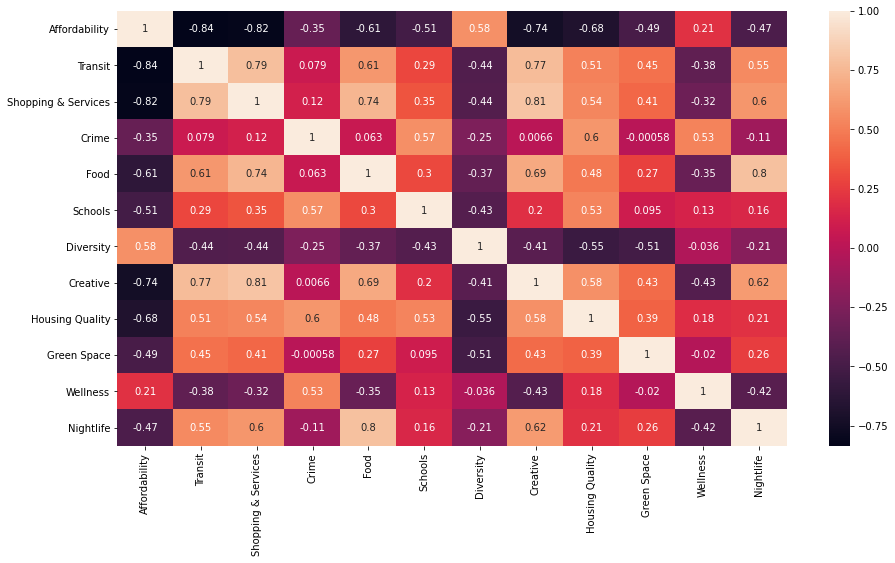

In [309]:
fig, ax = plt.subplots(figsize=[15,8])
sns.heatmap(df.corr(method='pearson'), annot=True)

The Pearson Correlation Coefficient describes how two variables are related to each other. As we can see from the above heatmap, we have multiple variables which are positively correlated, multiple variables that are negatively correlated and some that are not at all related to each other. We can use Principle Component Analysis to fully visualize and make sense of this data. Principle Component Analysis helps us reduce the number of dimensions of a dataset. The reduced number of dimensions still include factors from all the dimensions that our original dataset contains. 

# Principal Component Analysis

In [310]:
from sklearn.preprocessing import StandardScaler
features = df.columns[1:]
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=11)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components)

In [311]:
print(pca.explained_variance_ratio_)

[0.45591043 0.21496742 0.09574508 0.05616709 0.05219889 0.03571284
 0.02654106 0.02243163 0.01809893 0.01538658 0.00684003]


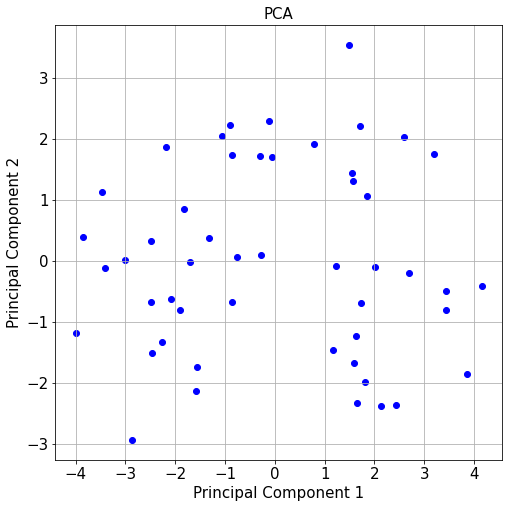

In [312]:
# plotting the scatter plot 
fig, ax = plt.subplots(figsize=[8,8])

plt.scatter(principal_df[0], principal_df[1], color='b')

plt.grid()
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('PCA', fontsize = 15)
#plt.legend()
plt.show()


Text(0.5, 1.0, 'Scree plot - explained variance of the 11 components')

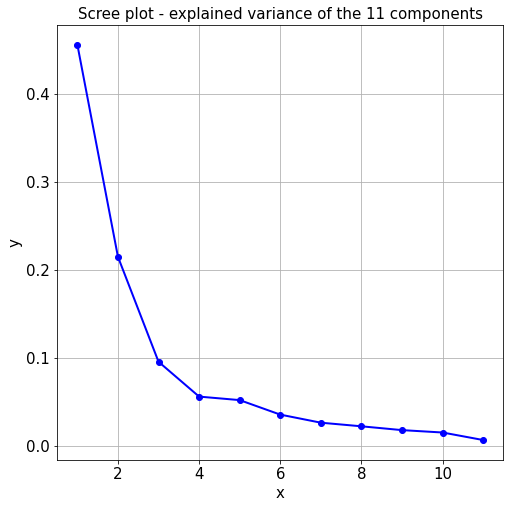

In [313]:
fig, ax = plt.subplots(figsize=[8,8])

plt.plot(np.arange(1,12),pca.explained_variance_ratio_,'b-o', lw=2)
plt.grid()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Scree plot - explained variance of the 11 components', fontsize = 15)

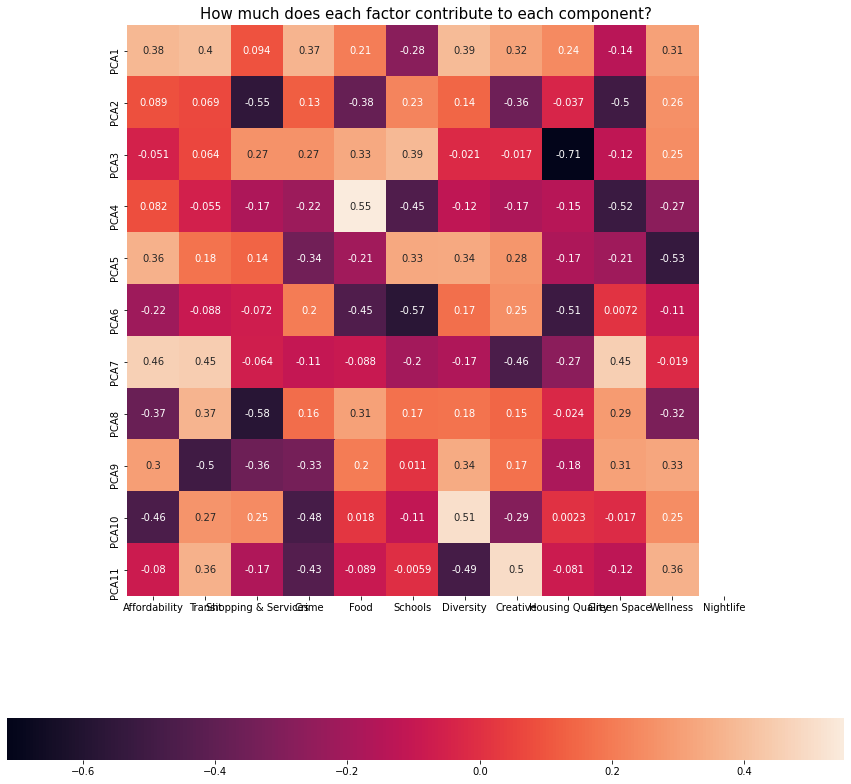

In [314]:
fig, ax1 = plt.subplots(figsize=[15,15])
ax = sns.heatmap(pca.components_,
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df.columns),
                 cbar_kws={"orientation": "horizontal"}, annot = True)
plt.title('How much does each factor contribute to each component?', fontsize=15)
ax.set_aspect("equal")

# Plotting the biplot - score plot + loadings plot

In [346]:
def loading_plot(coeff,labels=None):
    """
    score = projections of the points on the various principle components 
    coeff = coefficients of the linear combinations for the principle components 
    """
    fig , ax = plt.subplots(figsize = [15,10])
    n = coeff.shape[0] #number of principle components
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8, lw=3) #for the loading plot
        if labels is None:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, "Var"+str(i+1), color = 'green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, labels[i], color = 'k', ha='center', va='center')
 
    plt.title('Loading plot', fontsize=15)
    plt.xlabel("PC{}".format(1), fontsize = 15)
    plt.ylabel("PC{}".format(2), fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()

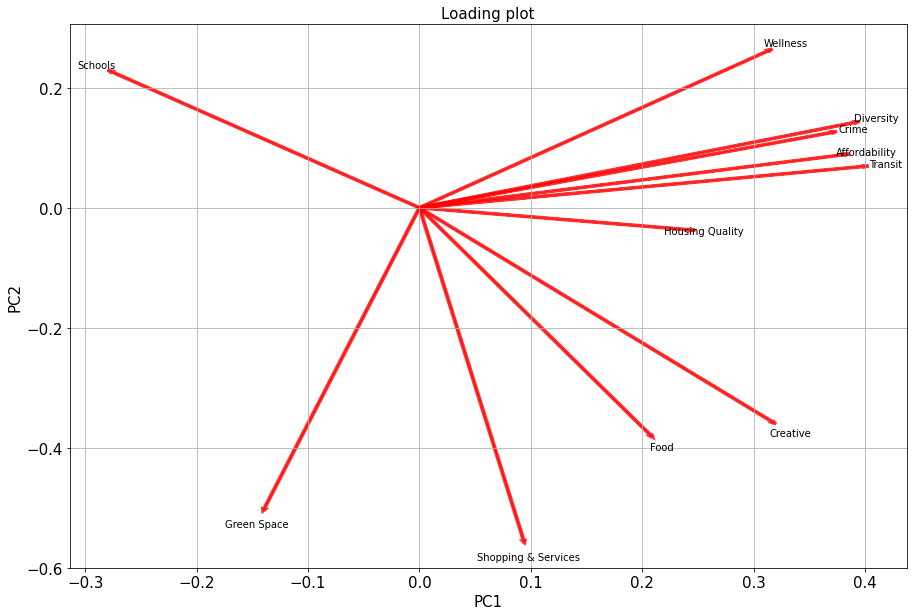

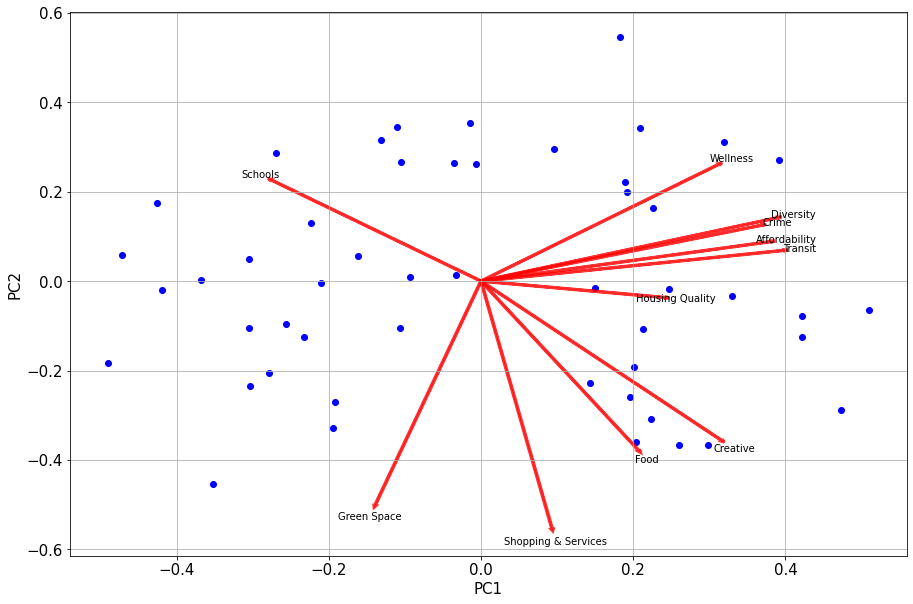

In [347]:
def biplot(score,coeff,labels=None):
    """
    score = projections of the points on the various principle components 
    coeff = coefficients of the linear combinations for the principle components 
    """
    xs = score[:,0] #x values - PC1
    ys = score[:,1] #y values - PC2
    n = coeff.shape[0] #number of principle components
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig , ax = plt.subplots(figsize = [15,10])
    plt.scatter(xs*scalex,ys*scaley, color='b') #for the scatter plot - plotting the scaled values
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8, lw=3) #for the loading plot
        if labels is None:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, "Var"+str(i+1), color = 'green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, labels[i], color = 'k', ha='center', va='center')
 
    plt.xlabel("PC{}".format(1), fontsize = 15)
    plt.ylabel("PC{}".format(2), fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()

"""
principle_components[:,0:2] returns the projections of all the points on the first two principle components - needed to 
plot the scatter plot

pca.components_ returns the coefficients for the linear combinations
"""    
loading_plot(np.transpose(pca.components_[0:2,:]),list(df_new.columns))
biplot(principle_components[:,0:2],np.transpose(pca.components_[0:2,:]),list(df.columns))


# Introducing two rows of outliers in the data

In [342]:
df_new = df.copy()
df_new.loc[len(df_new)]=[70,70,700,80,83,71,600,70,65,900,45,800]
df_new.loc[len(df_new)]=[77,60,72,82,800,73,65,900,62,75,-500,80]

In [317]:
df_new

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
Neighborhood,,,,,,,,,,,,
Park Slope,73.0,76.0,77.0,82.0,83.0,81.0,73.0,83.0,81.0,84.0,77.0,87.0
Lower East Side,73.0,82.0,83.0,75.0,83.0,76.0,78.0,84.0,72.0,76.0,73.0,92.0
Sunnyside,83.0,76.0,77.0,81.0,73.0,80.0,90.0,72.0,72.0,67.0,72.0,73.0
Cobble Hill & Boerum Hill,73.0,77.0,83.0,76.0,87.0,77.0,71.0,81.0,83.0,82.0,76.0,84.0
Greenpoint,77.0,76.0,75.0,78.0,81.0,92.0,74.0,78.0,80.0,72.0,70.0,87.0
Brooklyn Heights,70.0,83.0,82.0,88.0,78.0,72.0,65.0,81.0,86.0,86.0,80.0,72.0
Carroll Gardens & Gowanus,74.0,78.0,75.0,76.0,88.0,75.0,75.0,82.0,76.0,79.0,71.0,93.0
Murray Hill,64.0,82.0,85.0,87.0,80.0,88.0,69.0,77.0,85.0,84.0,80.0,77.0
Prospect Heights,79.0,79.0,76.0,73.0,79.0,71.0,84.0,79.0,67.0,75.0,74.0,85.0


# Principal Component Analysis and Biplot after introducing two new rows

In [327]:
features = df_new.columns[1:]
# Separating out the features
x_new = df_new.loc[:, features].values
# Standardizing the features
x_new = StandardScaler().fit_transform(x_new)
pca_new = PCA(n_components=11)
principal_components_new = pca_new.fit_transform(x_new)
principal_df_new = pd.DataFrame(data = principal_components_new)

In [328]:
print(pca_new.explained_variance_ratio_)

[3.69647883e-01 2.89222657e-01 1.96209640e-01 8.22571341e-02
 4.11511393e-02 2.01991331e-02 5.37377791e-04 4.05780952e-04
 1.79918385e-04 1.12172123e-04 7.71645000e-05]


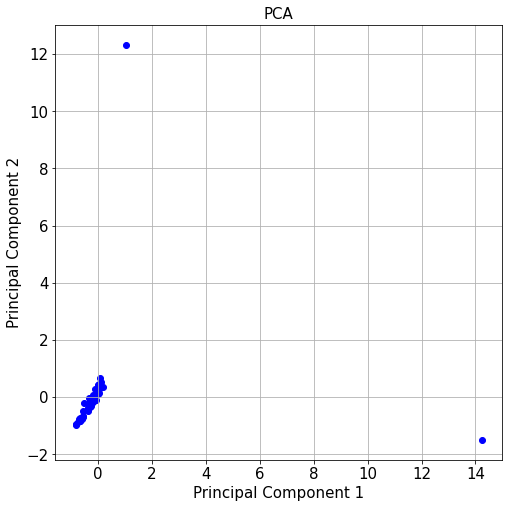

In [329]:
# plotting the scatter plot 
fig, ax = plt.subplots(figsize=[8,8])

plt.scatter(principal_df_new[0], principal_df_new[1], color='b')

plt.grid()
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('PCA', fontsize = 15)
#plt.legend()
plt.show()


Text(0.5, 1.0, 'Scree plot - explained variance of the 11 components')

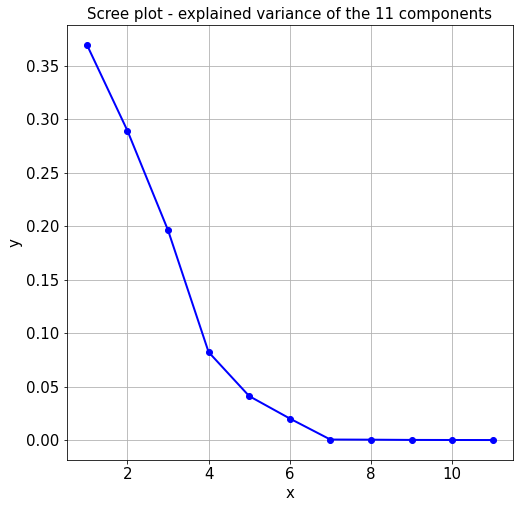

In [330]:
fig, ax = plt.subplots(figsize=[8,8])

plt.plot(np.arange(1,12),pca_new.explained_variance_ratio_,'b-o', lw=2)
plt.grid()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Scree plot - explained variance of the 11 components', fontsize = 15)

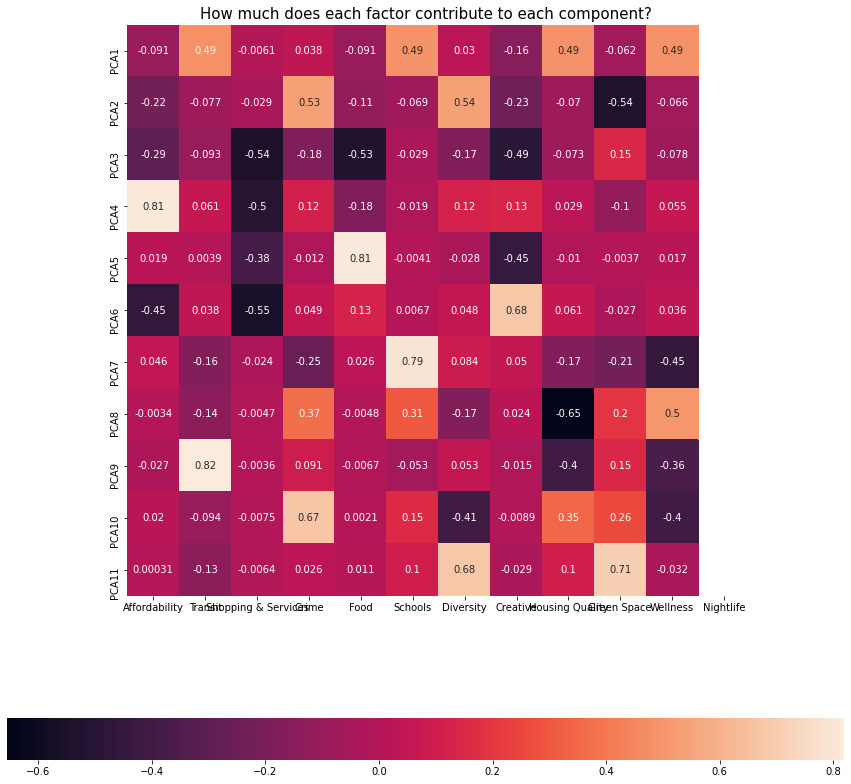

In [334]:
fig, ax1 = plt.subplots(figsize=[15,15])
ax = sns.heatmap(pca_new.components_,
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_new.n_components_+1)],
                 xticklabels=list(df.columns),
                 cbar_kws={"orientation": "horizontal"}, annot=True)
plt.title('How much does each factor contribute to each component?', fontsize=15)
ax.set_aspect("equal")

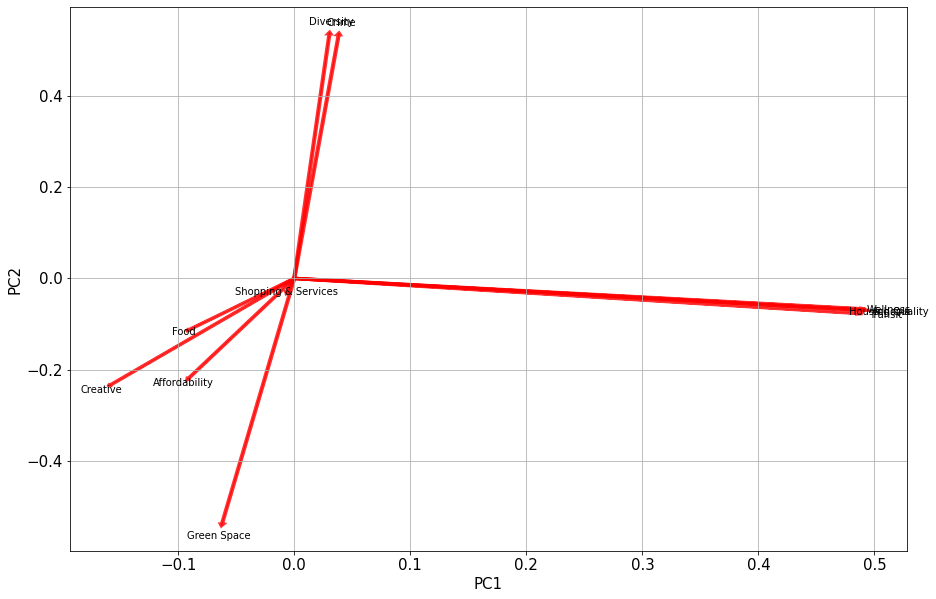

In [338]:
loading_plot(np.transpose(pca_new.components_[0:2,:]),list(df_new.columns))

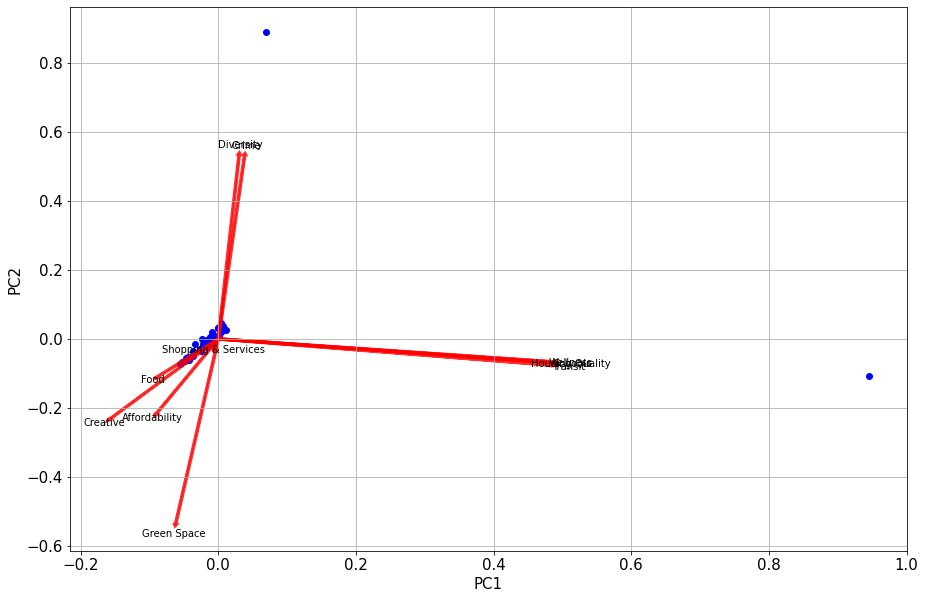

In [332]:
biplot(principal_components_new[:,0:2],np.transpose(pca_new.components_[0:2,:]),list(df_new.columns))
plt.show()

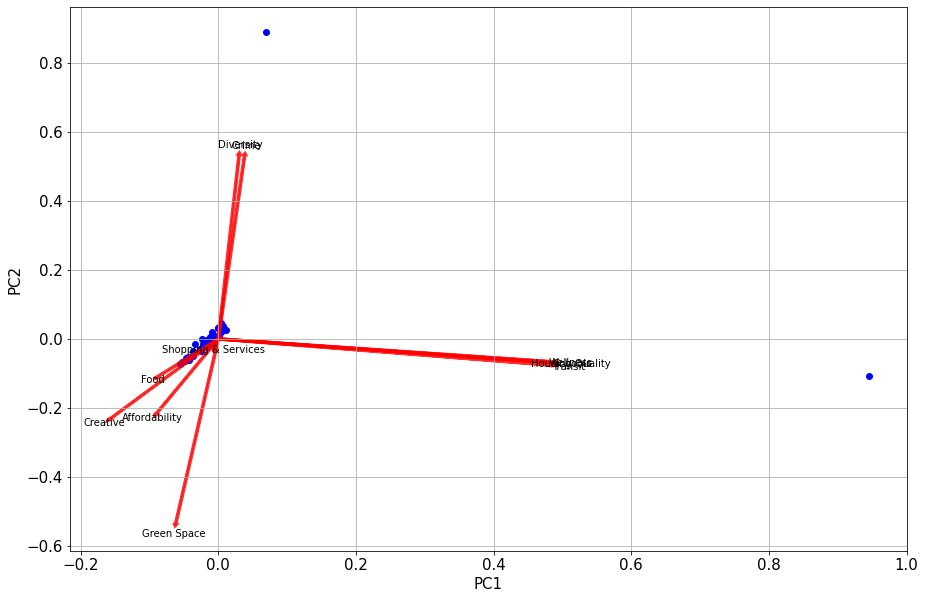

In [348]:
biplot(principal_components_new[:,0:2],np.transpose(pca_new.components_[0:2,:]),list(df_new.columns))

In the above plots, the variables have been scaled. Not scaling the variables hinders good visualization because the length of the eigenvectors is really small as compared to the scale of the non-scaled data. 

Introducing outliers affects the calculation of PCs in the sense that they are now biased. They cluster all the remaining data points into one cluster which does not let us observe what happens to the majority of the data. In this case, the values of PC3 and PC4 are also significant enough to not be ignored. Hence, it's best to remove outliers and then perform PCA.

# Conclusion

The eigenvectors that do not have a larger angle between them are more closely correlated than others. The length of the eigenvector describes the variance of that particular component with respect to PC1 and PC2. Hence, PCA proves to be a very efficient technique to visualize data which has larger dimensions since it reduces the dimensions (through SVD). 